In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
prosody_data = pd.read_csv('prosodic_features_M1.csv ')

In [3]:
prosody_data.head()

,Row Labels,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Class,Class1
0,P01,34.186796,0.011510,0.000333,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,87.8,211.4666,186.2474,20.4186,13.8120,59.2,2885.361924,5.106224,1,5
1,P03,89.165042,0.030218,0.000332,70.536185,400.408060,128.747442,64.528996,298.947756,97.570208,...,258.4,303.0330,292.7502,38.6264,36.2622,135.8,12286.259430,4.433070,0,4
2,P04,47.795525,0.006202,0.000122,74.847180,359.197092,137.312149,43.985296,272.751359,121.718841,...,147.2,236.9652,237.7730,31.9154,25.8936,91.6,5577.512799,4.530129,0,5
3,P05,30.842617,0.002352,0.000071,79.266129,311.060876,122.560903,28.550343,162.899076,114.627425,...,77.0,175.7884,178.9750,19.7052,16.4944,49.0,2814.617977,5.571558,1,6
4,P06,81.745013,0.003205,0.000040,73.461743,355.214131,107.848640,23.362177,124.561066,101.222895,...,219.6,251.8146,248.0354,14.6300,12.1984,137.0,8272.626109,4.831482,0,5


In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row Labels        136 non-null    object 
 1   duration          136 non-null    float64
 2   energy            136 non-null    float64
 3   power             136 non-null    float64
 4   min_pitch         136 non-null    float64
 5   max_pitch         136 non-null    float64
 6   mean_pitch        136 non-null    float64
 7   pitch_sd          136 non-null    float64
 8   pitch_abs         136 non-null    float64
 9   pitch_quant       136 non-null    float64
 10  pitchUvsVRatio    136 non-null    float64
 11  Time:8            136 non-null    float64
 12  iDifference       136 non-null    float64
 13  diffPitchMaxMin   136 non-null    float64
 14  diffPitchMaxMean  136 non-null    float64
 15  diffPitchMaxMode  136 non-null    float64
 16  intensityMin      136 non-null    float64
 1

In [5]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Class,Class1
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,146.933824,213.120200,211.117346,27.542576,21.547319,88.869118,5564.506801,4.950746,0.485294,4.963235
std,25.020621,0.009567,0.000113,5.020964,28.116824,41.204481,12.004259,66.659868,45.996138,0.672061,...,69.621461,38.825901,37.244032,6.548720,7.415646,40.697769,3251.706820,0.723714,0.501631,0.773717
min,20.008654,0.000344,0.000017,65.677083,292.289057,100.085216,19.527561,95.443774,84.022553,0.362657,...,37.000000,137.988800,117.676200,12.514800,9.198200,26.600000,169.367686,3.189661,0.000000,3.000000
25%,36.927556,0.003154,0.000071,71.730017,345.862086,123.752956,34.522436,201.362353,113.562160,0.803205,...,96.000000,183.010700,185.858750,23.492300,16.663750,57.150000,3251.882716,4.529477,0.000000,5.000000
50%,50.899187,0.007480,0.000129,73.693814,366.651421,181.081399,40.778655,251.642759,178.079841,1.056822,...,130.700000,212.212500,208.594000,27.125600,19.936400,80.100000,4905.650062,4.967754,0.000000,5.000000
75%,75.672201,0.013697,0.000226,75.936399,388.540274,199.754522,47.049624,288.256713,204.350281,1.337123,...,192.950000,241.176950,234.978050,31.570950,24.978900,115.900000,7502.797524,5.448852,1.000000,5.000000
max,138.779608,0.063112,0.000602,105.797013,413.363997,240.799891,93.036005,454.485046,240.121629,5.398856,...,362.000000,309.378200,308.948000,45.364000,48.814200,225.600000,15884.723630,6.647218,1.000000,7.000000


Text(0.5, 0, 'Recommend Hiring')

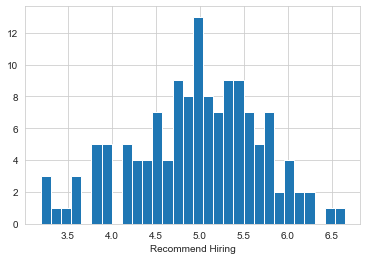

In [6]:
sns.set_style('whitegrid')
prosody_data['RecommendHiring'].hist(bins=30)
plt.xlabel('Recommend Hiring')

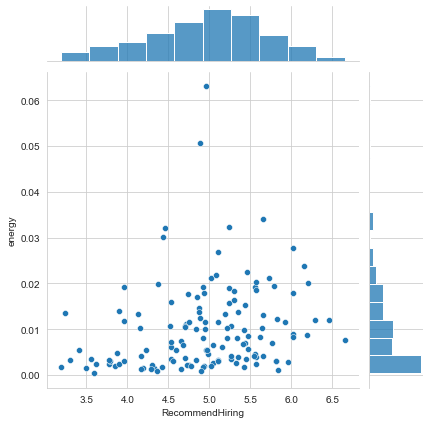

In [7]:
sns.jointplot(y='energy', x='RecommendHiring', data=prosody_data)

Text(0.5, 0, 'Recommend Hiring')

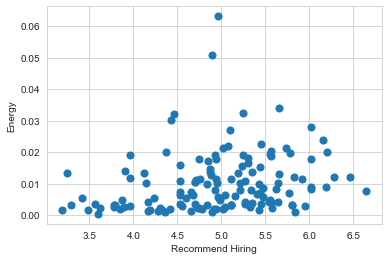

In [8]:
dA = pd.read_csv('prosodic_features_M1.csv ')
y = dA['RecommendHiring']

x1 = dA['energy']
x2 = dA['speakRate']
x3 = dA['avgBand1']

plt.scatter(y,x1,s=50)
plt.ylabel('Energy')
plt.xlabel('Recommend Hiring')


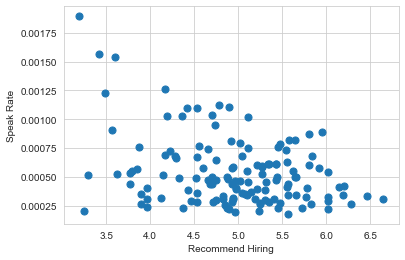

In [9]:
plt.scatter(y,x2,s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Recommend Hiring')
plt.show()

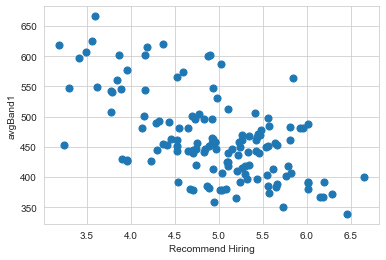

In [10]:

plt.scatter(y,x3,s=50)
plt.ylabel('avgBand1')
plt.xlabel('Recommend Hiring')
plt.show()

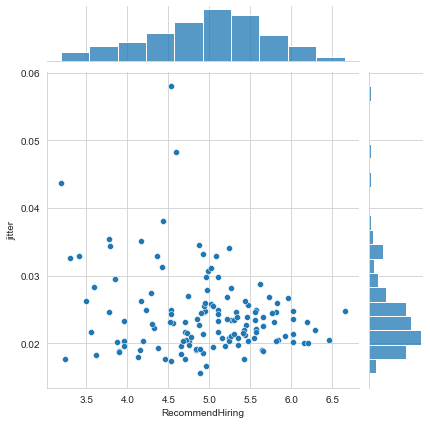

In [11]:
sns.jointplot(y='jitter', x='RecommendHiring', data=prosody_data)

df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','RecommendHiring']]
sns.pairplot(df1,hue='RecommendHiring',palette='coolwarm')

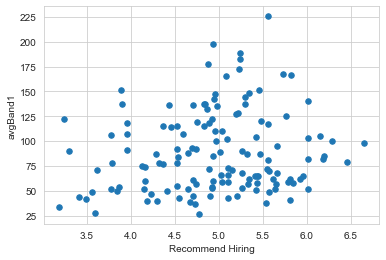

In [12]:
x4 =dA['numRising']
    
plt.scatter(y,x4,s=30)
plt.ylabel('avgBand1')
plt.xlabel('Recommend Hiring')
plt.show()

# Select Features Using Lasso

In [14]:
prosody_data_X = prosody_data.drop(['Class','Class1','RecommendHiring'],axis=1)
prosody_data_y = prosody_data['RecommendHiring']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)

In [16]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

In [17]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import cross_val_score

In [18]:
lasso = Lasso(alpha=.5)
lasso.fit(X_train, y_train)

cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

ValueError: could not convert string to float: 'PP71'

In [ ]:
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
rankDict = {}
rankDict = ranks['Lasso']
rankDict

In [ ]:
selectedFeatures_Lasso = []

selectedFeatures_Lasso = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


selectedFeatures_Lasso_10 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<10):
        selectedFeatures_Lasso_10.append(key)
        i+=1
        
selectedFeatures_Lasso_20 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<20):
        selectedFeatures_Lasso_20.append(key)
        i+=1
        
selectedFeatures_Lasso_30 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<30):
        selectedFeatures_Lasso_30.append(key)
        i+=1
print("Top 10 Selected Features Using Lasso:",selectedFeatures_Lasso_10 )
 
print("\n\n\nTop 20 Selected Features Using Lasso:",selectedFeatures_Lasso_20 )

print("\n\n\nTop 30 Selected Features Using Lasso:",selectedFeatures_Lasso_30 )
  
#selectedFeatures_Lasso.keys()

# Apply Nural Networks on Selected features using Lasso

In [ ]:
#import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    

In [ ]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
def apply_NN_Moadel(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_Lasso_No):
    scaler = MinMaxScaler()
    X=scaler.fit_transform(prosody_data[selectedFeatures_Lasso_No])
    y=prosody_data['Class']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    
    cvscores = []
        
    keras.backend.set_floatx('float64')
    
    # create model
    for train, test in kfold.split(X, y):
        model= keras.Sequential([
            keras.layers.Dense(no_of_inNeurons, input_shape=(no_of_inNeurons,), activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        # Fit the model
        clf=model.fit(X_train, y_train, epochs=no_of_epochs, batch_size=10, verbose=0)


        # evaluate the model 
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

        cvscores.append(scores[1] * 100)
        
               
        
    
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))    
    
    #Plot ROC
    
    tnser_pred = model.predict(X_test)
    # generate a no skill prediction (majority class)
    ns_pred = [0 for _ in range(len(y_test))]
    # calculate accuracy scores
    ns_auc = roc_auc_score(y_test, ns_pred)
    tnser_auc = roc_auc_score(y_test, tnser_pred)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (tnser_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_pred)
    tnser_fpr, tnser_tpr, _ = roc_curve(y_test, tnser_pred)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
    plt.plot(tnser_fpr, tnser_tpr,marker='o', label='NN ' )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
  
    
    pred1=[]
    pred=model.predict(X_test)
    for element in pred:
        if element > 6:
            pred1.append(1)
        else:
            pred1.append(0)
    print(classification_report(y_test,pred1,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred1))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred1), annot = True,fmt='d')
    plt.show
    
    
    return (model, cvscores, tnser_fpr, tnser_tpr, tnser_auc)

cvscores_NN_10= []
(model_NN_10,cvscores_NN_10,FP_Rate_NN_10,TP_Rate_NN_10,auc_NN_10) = apply_NN_Moadel(10,18,200,selectedFeatures_Lasso_10)

cvscores_NN_20= []
(model_NN_20,cvscores_NN_20,FP_Rate_NN_20,TP_Rate_NN_20,auc_NN_20) = apply_NN_Moadel(20,18,200,selectedFeatures_Lasso_20)

cvscores_NN_30= []
(model_NN_30,cvscores_NN_30,FP_Rate_NN_30,TP_Rate_NN_30,auc_NN_30) = apply_NN_Moadel(30,24,200,selectedFeatures_Lasso_30)

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
X20=prosody_data[selectedFeatures_Lasso_20]
X1 =prosody_data[['max_pitch',
 'pitch_sd',
 'pitchUvsVRatio',
 'diffPitchMaxMean',
 'diffPitchMaxMode',
 'intensityMean',
 'intensityQuant',
 'diffIntMaxMean',
 'avgVal1',
 'avgVal3',
 'avgBand1',
 'avgBand3',
 'fmean1',
 'fmean2',
 'f3meanf1',
 'f1STD',
 'f2STDf1',
 'jitter',
 'jitterRap',
 'percentUnvoiced',
 'PercentBreaks',
 'numPause',
 'avgDurPause',
 'AvgTotRis:3']]
y20=prosody_data['Class1']
y1=prosody_data['Class1']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=10)
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20, random_state=10)

In [ ]:
def Apply_Model(model,model_name,X_train,X_test,y_train,y_test):
    
    clf = model.fit(X_train,y_train)
    pred = model.predict(X_test)            
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train,y_train)
    # predict probabilities
    m_probs = model.predict_proba(X_test)
        
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    m_auc = roc_auc_score(y_test, m_probs)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (m_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label=model_name)   
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred,zero_division=0))
    
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt='d')
    plt.show()
    
    
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['1','2','3','4','5','6','7','8','9','10']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Model')
    plt.show()
    
    
    return (m_fpr, m_tpr,m_auc)
    
    

# Applying SVM

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)

(svm_fpr, svm_tpr, svm_auc)= Apply_Model(svc_model,"SVM",X20_train, X20_test, y20_train, y20_test)
(svm_fpr1, svm_tpr1, svm_auc1)= Apply_Model(svc_model,"SVM1",X1_train, X1_test, y1_train, y1_test)

cross_val_score(SVC(gamma='auto'), X20, y20,cv=10)
#m_Cross = np.mean(cross_val_score)
#print("Mean : ",m_Cross)

# Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X20_train,y20_train)
    pred_i = knn.predict(X20_test)
    error_rate.append(np.mean(pred_i != y20_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
(knn_fpr, knn_tpr, knn_auc)=Apply_Model(knn,"KNN",X20_train, X20_test, y20_train, y20_test)

cross_val_score(knn, X20, y20,cv=10)

# Applying Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
(rfc_fpr, rfc_tpr, rfc_auc)=Apply_Model(rfc,"RFC",X20_train, X20_test, y20_train, y20_test)

cross_val_score(rfc, X20, y20,cv=10)


In [ ]:
plt.plot(FP_Rate_NN_10,TP_Rate_NN_10, label="ANN 10, auc="+str(auc_NN_10,))
plt.plot(FP_Rate_NN_20,TP_Rate_NN_20, label="ANN 20, auc="+str(auc_NN_20,))
plt.plot(FP_Rate_NN_30,TP_Rate_NN_30, label="ANN 30, auc="+str(auc_NN_30,))

plt.plot(svm_fpr, svm_tpr, label="SVM 20, auc="+str(svm_auc))
plt.plot(knn_fpr, knn_tpr, label="KNN 20, auc="+str(knn_auc))
plt.plot(rfc_fpr, rfc_tpr, label="RFC 20, auc="+str(rfc_auc))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()